

#**Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions.
# **Importing Necessary Libraries and Data**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from remote link
url='http://bit.ly/w-data'
df=pd.read_csv(url)
print('Data successfully read')
df.head()

Data successfully read


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## **Exploratory Data Analysis**

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
print(df.corr())
print('\n')
print('Here we can see a strong positive correlation in our data')

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


Here we can see a strong positive correlation in our data


Let's plot a scatterplot to visualize the relationship between our data. Here we use hours studied as a **independent variable**(x-axis) and Percentage score as **dependent variable**(y-axis)

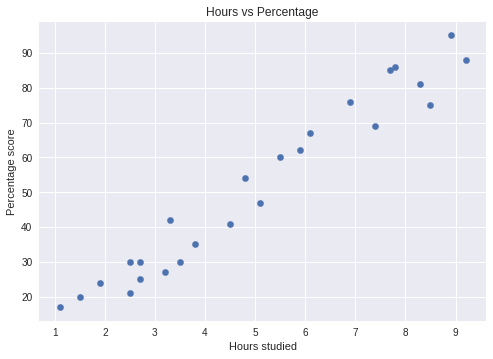

In [5]:
plt.style.use('seaborn')
df.plot(x='Hours',y='Scores',kind='scatter',s=40)
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.title('Hours vs Percentage');

From the graph above, we can see that there is a positive linear relation between hours studied and percentage of score.

# **Preparing the data**

First step in preparation of data will be to divide our data inputs and outputs.


In [6]:
X=df[['Hours']].values
y=df['Scores'].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


## **Training the algorithm**

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

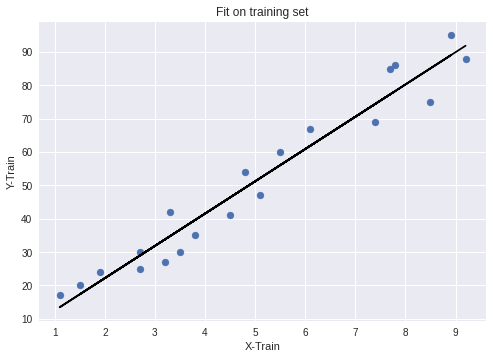

In [9]:
# Plotting test data 
plt.scatter(X_train, y_train)
# Plotting regression line
plt.plot(X_train, regressor.predict(X_train), color='black')
plt.title('Fit on training set')
plt.xlabel('X-Train')
plt.ylabel('Y-Train');

# **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
y_pred=regressor.predict(X_test) # Predicting scores

In [11]:
# Comparing actual vs predicted score
pred_df=pd.DataFrame({'Hours':X_test.flatten(),'Actual_score':y_test,'Predicted_score':y_pred})
print(pred_df)

   Hours  Actual_score  Predicted_score
0    8.3            81        83.188141
1    2.5            30        27.032088
2    2.5            21        27.032088
3    6.9            76        69.633232
4    5.9            62        59.951153


**Simple Mathematics behind this model prediction**

Predicted_score= hours*coefficient + Intercept

In [12]:
# Lets find intecept and coefficiant
Intercept=regressor.intercept_
coef=regressor.coef_
# Lets predict the score for the first value in dataframe pred_df
pred_maths= pred_df.iloc[0,0]*coef+Intercept
print('Manually predicted score using formulae = {}'.format(pred_maths[0]))
print('\n')
print('Prediction done using regression model = {}'.format(pred_df.iloc[0,2]))



Manually predicted score using formulae = 83.18814103588203


Prediction done using regression model = 83.18814103588203


**What will be predicted score if a student studies for 9.25 hrs/ day?**

Let's find out.

In [16]:
hours= [[9.5]]
pred=regressor.predict(hours)
print('No of hours = {} \nPredicted score = {}'.format(hours[0][0],pred[0]))

No of hours = 9.5 
Predicted score = 94.80663482122885


# **Evaluating the Model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
